<a href="https://colab.research.google.com/github/MikolajKasprzyk/superstore_sales/blob/main/superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# reading the data into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/superstore_sales/'
                'superstore_sales.csv')

In [3]:
# first rows of dataframe
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# dataframe shape
df.shape

(9994, 20)

In [5]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9994 non-null   object 
 1   Order_Date     9994 non-null   object 
 2   Ship_Date      9994 non-null   object 
 3   Ship_Mode      9994 non-null   object 
 4   Customer_ID    9994 non-null   object 
 5   Customer_Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal_Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product_ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product_Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [6]:
# replace spaces with '_' in column names as it can become problematic
# in further use of dataframe
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.head(5)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
# change 'Postal Code' to string
df['Postal_Code'] = df['Postal_Code'].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9994 non-null   object 
 1   Order_Date     9994 non-null   object 
 2   Ship_Date      9994 non-null   object 
 3   Ship_Mode      9994 non-null   object 
 4   Customer_ID    9994 non-null   object 
 5   Customer_Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal_Code    9994 non-null   object 
 11  Region         9994 non-null   object 
 12  Product_ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product_Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [10]:
# check for null values in df, and there are non, which is not so common
df.isnull().sum()

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub-Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
# check if there are duplicated rows, and there is non
df[df.duplicated()]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [12]:
# check if there are some unresonably high values
df.nlargest(10, 'Sales')[['Sales', 'Quantity', 'Product_Name','Profit', 'Discount']]
# here first row seems odd - that would be something to clarify with client,
# as for now it can stay as it is

,Sales,Quantity,Product_Name,Profit,Discount
2697,22638.480,6,Cisco TelePresence System EX90 Videoconferenci...,-1811.0784,0.5
6826,17499.950,5,Canon imageCLASS 2200 Advanced Copier,8399.9760,0.0
8153,13999.960,4,Canon imageCLASS 2200 Advanced Copier,6719.9808,0.0
2623,11199.968,4,Canon imageCLASS 2200 Advanced Copier,3919.9888,0.2
4190,10499.970,3,Canon imageCLASS 2200 Advanced Copier,5039.9856,0.0
9039,9892.740,13,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700,0.0
4098,9449.950,5,Ibico EPK-21 Electric Binding System,4630.4755,0.0
4277,9099.930,7,"3D Systems Cube Printer, 2nd Generation, Magenta",2365.9818,0.0
8488,8749.950,5,HP Designjet T520 Inkjet Large Format Printer ...,2799.9840,0.0
6425,8399.976,4,Canon imageCLASS 2200 Advanced Copier,1119.9968,0.4


In [13]:
# checking if there are some other odd values
df.nlargest(10, 'Profit')[['Sales', 'Quantity', 'Product_Name','Profit']]

,Sales,Quantity,Product_Name,Profit
6826,17499.950,5,Canon imageCLASS 2200 Advanced Copier,8399.9760
8153,13999.960,4,Canon imageCLASS 2200 Advanced Copier,6719.9808
4190,10499.970,3,Canon imageCLASS 2200 Advanced Copier,5039.9856
9039,9892.740,13,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700
4098,9449.950,5,Ibico EPK-21 Electric Binding System,4630.4755
2623,11199.968,4,Canon imageCLASS 2200 Advanced Copier,3919.9888
509,6354.950,5,Fellowes PB500 Electric Punch Plastic Comb Bin...,3177.4750
8488,8749.950,5,HP Designjet T520 Inkjet Large Format Printer ...,2799.9840
7666,5399.910,9,Hewlett Packard LaserJet 3310 Copier,2591.9568
6520,5443.960,4,GBC DocuBind P400 Electric Binding System,2504.2216


In [14]:
# checking if there are some other odd values
df.nsmallest(10, 'Profit')[['Sales', 'Quantity', 'Product_Name','Profit', 'Discount']]

,Sales,Quantity,Product_Name,Profit,Discount
7772,4499.985,5,Cubify CubeX 3D Printer Double Head Print,-6599.9780,0.7
683,7999.980,4,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,0.5
9774,2177.584,8,GBC DocuBind P400 Electric Binding System,-3701.8928,0.8
3011,2549.985,5,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800,0.7
4991,1889.990,5,Ibico EPK-21 Electric Binding System,-2929.4845,0.8
3151,1799.994,2,Cubify CubeX 3D Printer Double Head Print,-2639.9912,0.7
5310,1525.188,6,Fellowes PB500 Electric Punch Plastic Comb Bin...,-2287.7820,0.8
9639,4297.644,13,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-1862.3124,0.4
1199,1088.792,4,GBC DocuBind P400 Electric Binding System,-1850.9464,0.8
2697,22638.480,6,Cisco TelePresence System EX90 Videoconferenci...,-1811.0784,0.5


In [15]:
# sort dataframe on 'Order_Date'
df.sort_values(by=['Order_Date'],inplace=True)

In [16]:
# check 'Country' of orders, all from USA
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [17]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Whittier           1
Ontario            1
Montebello         1
Rock Hill          1
Goldsboro          1
Name: City, Length: 531, dtype: int64

In [18]:
# check cities with biggest sales
df.groupby('City')['Sales'].sum().sort_values(ascending=False)

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 531, dtype: float64

<ipython-input-19-47d14a9f3ef1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None,
<ipython-input-19-47d14a9f3ef1>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, ci=None,


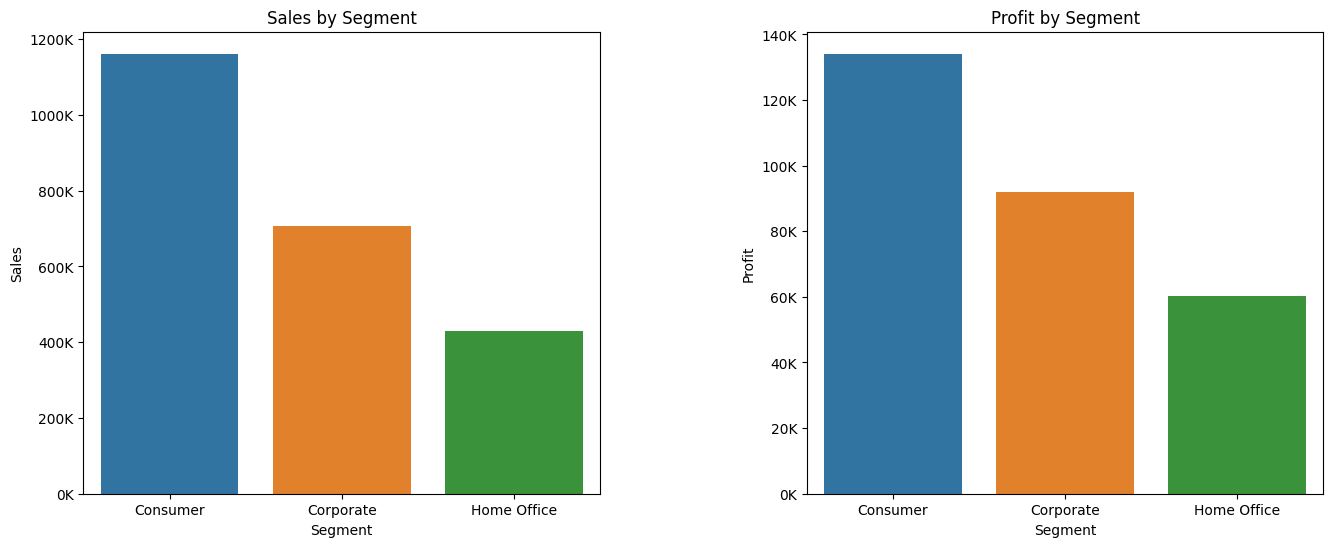

In [19]:
# bar charts of sales and profit by segment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None,
            order=df.groupby('Segment')['Sales'].sum()\
            .sort_values(ascending=False).index, ax=ax1)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}K".format(x * 1e-3)))
ax1.set_title('Sales by Segment')

sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, ci=None,
            order=df.groupby('Segment')['Profit'].sum()
            .sort_values(ascending=False).index, ax=ax2)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}K".format(x * 1e-3)))
ax2.set_title('Profit by Segment')

plt.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
plt.show()

Text(0.5, 1.0, '# Orders by Segment')

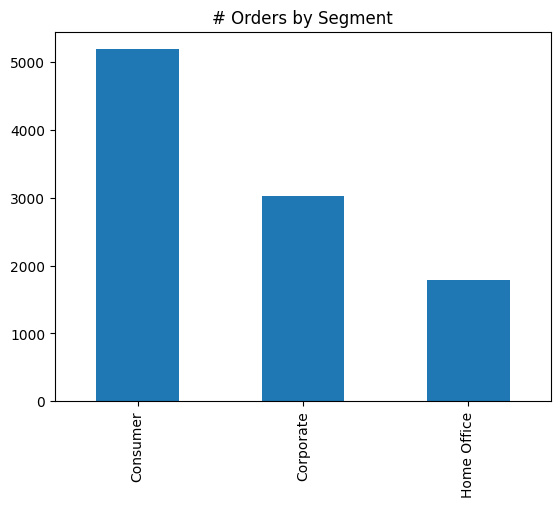

In [20]:
# number of orders by segment
df['Segment'].value_counts().plot.bar().set_title('# Orders by Segment')

Text(0.5, 1.0, '# Orders by Ship')

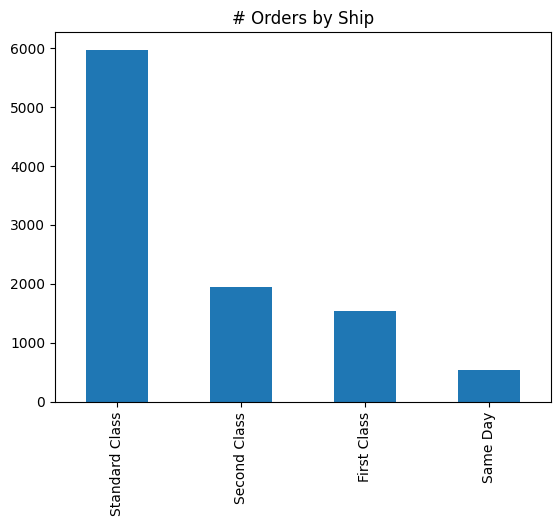

In [21]:
# number of orders by ship mode
df['Ship_Mode'].value_counts().plot.bar().set_title('# Orders by Ship')

In [22]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

<ipython-input-23-a44e532f5573>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Sales', data=df, estimator=sum, ci=None,


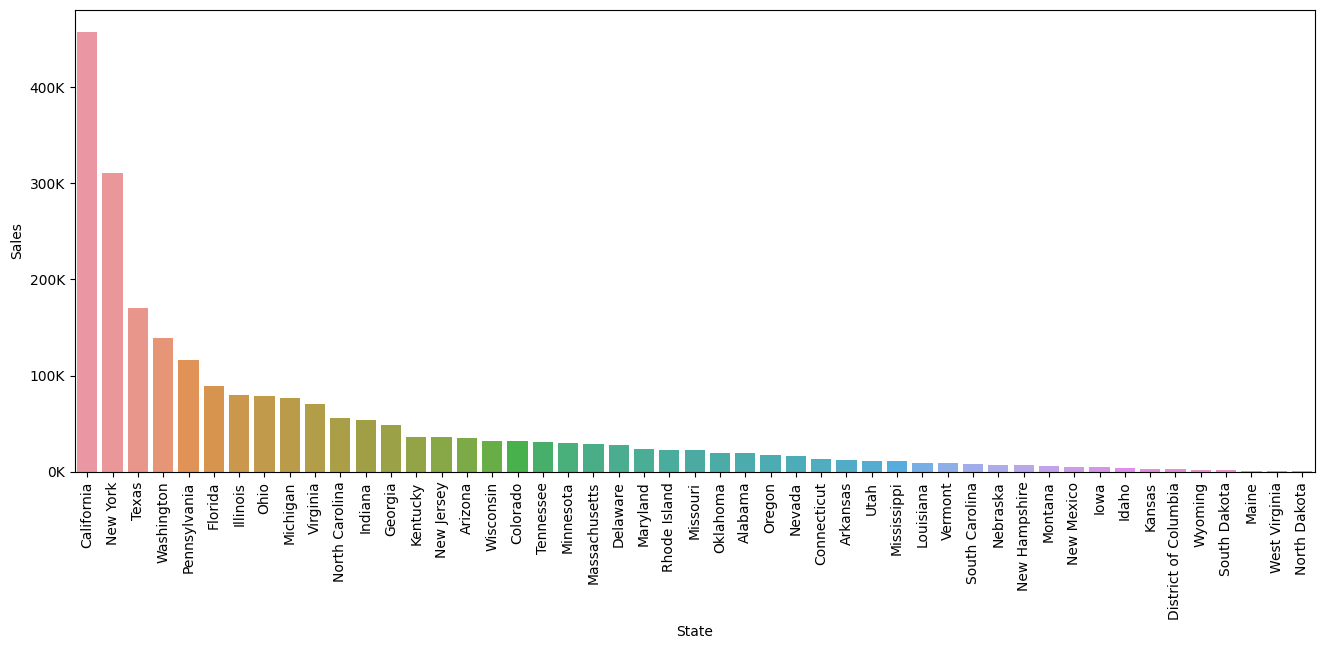

In [23]:
# bar chart of sales by state
df['State'] = df['State'].astype('category')

plt.figure(figsize=(16, 6))
sns.barplot(x='State', y='Sales', data=df, estimator=sum, ci=None,
            order=df.groupby('State')['Sales'].sum()\
            .sort_values(ascending=False).index)\
            .yaxis.set_major_formatter(plt.FuncFormatter(
                lambda x, loc: "{:.0f}K".format(x * 1e-3)))
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-24-08e488c21844>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Profit', data=df, estimator=sum, ci=None,


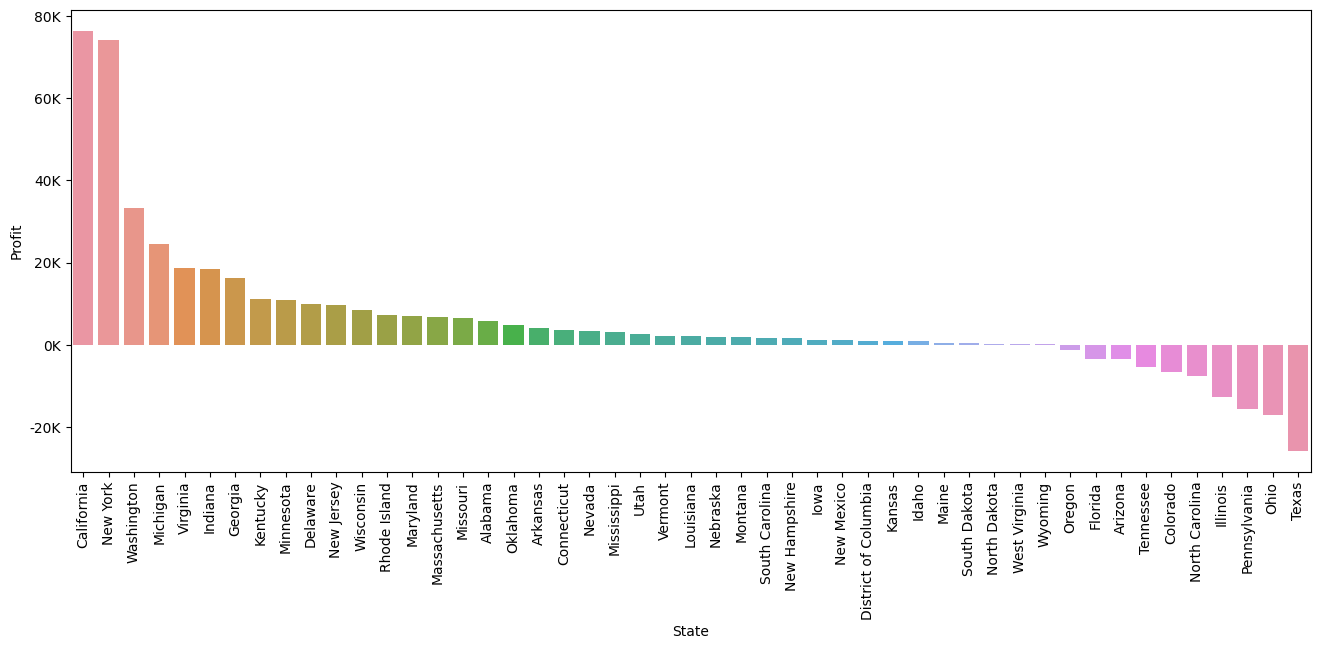

In [24]:
# bar chart of profit by state
df['State'] = df['State'].astype('category')

plt.figure(figsize=(16, 6))
sns.barplot(x='State', y='Profit', data=df, estimator=sum, ci=None,
            order=df.groupby('State')['Profit'].sum()\
            .sort_values(ascending=False).index)\
            .yaxis.set_major_formatter(plt.FuncFormatter(
                lambda x, loc: "{:.0f}K".format(x * 1e-3)))
plt.xticks(rotation='vertical')
plt.show()

In [25]:
# show categories
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

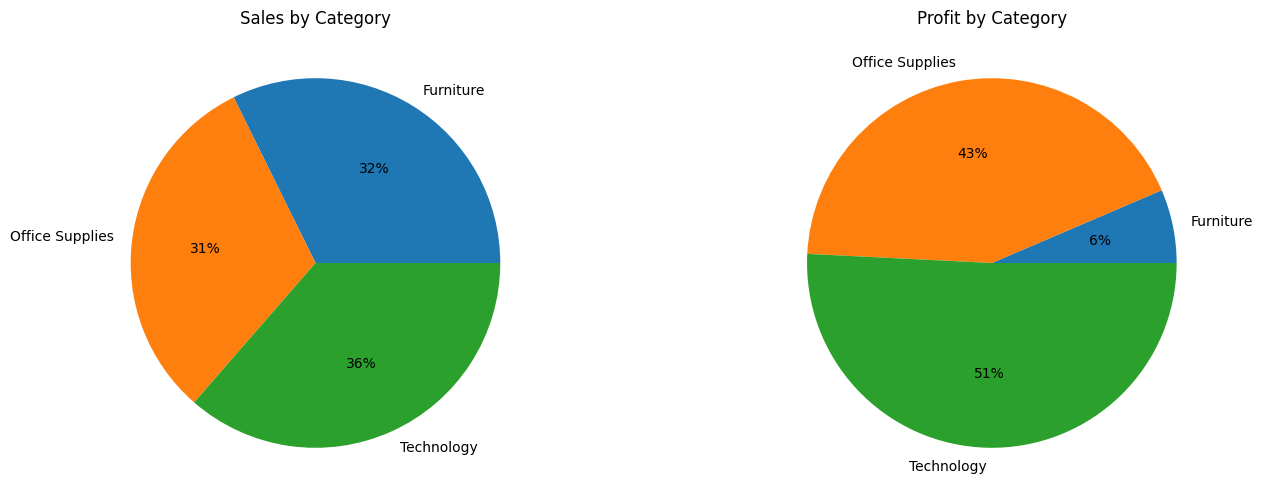

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum()
ax1.pie(sales_by_category, labels=sales_by_category.index, autopct='%.0f%%')
ax1.set_title('Sales by Category')

# Profit by Category
profit_by_category = df.groupby('Category')['Profit'].sum()
ax2.pie(profit_by_category, labels=profit_by_category.index, autopct='%.0f%%')
ax2.set_title('Profit by Category')

plt.show()


In [27]:
# top products by sales
top_products = df.groupby(['Product_Name']).sum().sort_values(
        'Sales',ascending=False).head(5)
top_products.reset_index(inplace=True)
top_products

<ipython-input-27-9ca0d8380650>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products = df.groupby(['Product_Name']).sum().sort_values(


,Product_Name,Sales,Quantity,Discount,Profit
0,Canon imageCLASS 2200 Advanced Copier,61599.824,20,0.6,2.519993e+04
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,31,2.4,7.753039e+03
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1.811078e+03
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,39,1.6,5.684342e-14
4,GBC DocuBind TL300 Electric Binding System,19823.479,37,3.3,2.233505e+03


In [28]:
# top products by profit
top_products = df.groupby(['Product_Name']).sum().sort_values(
        'Profit',ascending=False).head(5)
top_products.reset_index(inplace=True)
top_products

<ipython-input-28-855a8ddede81>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products = df.groupby(['Product_Name']).sum().sort_values(


,Product_Name,Sales,Quantity,Discount,Profit
0,Canon imageCLASS 2200 Advanced Copier,61599.824,20,0.6,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,31,2.4,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,18839.686,38,1.6,6983.8836
3,Canon PC1060 Personal Laser Copier,11619.834,19,0.6,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,12,0.5,4094.9766


<ipython-input-29-1e67ddcf5a78>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None,


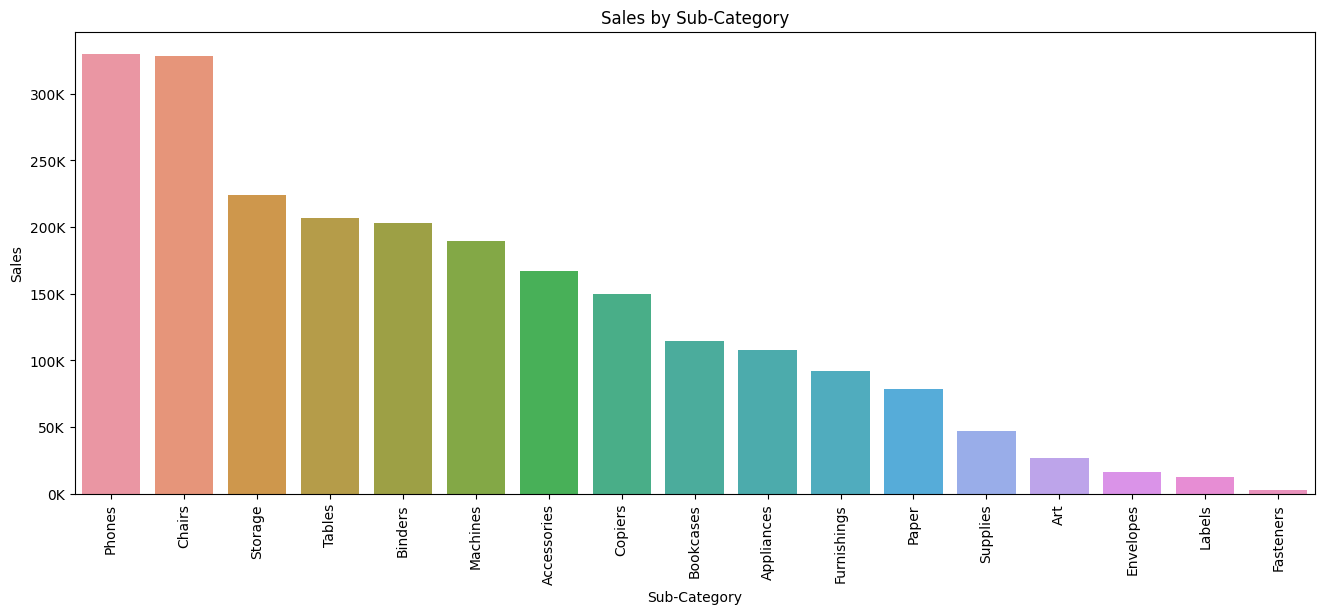

In [29]:
# bar chart of sales by sub-category
plt.figure(figsize=(16, 6))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None,
            order=df.groupby('Sub-Category')['Sales'].sum()\
            .sort_values(ascending=False).index)\
            .yaxis.set_major_formatter(plt.FuncFormatter(
                lambda x, loc: "{:.0f}K".format(x * 1e-3)))

plt.xticks(rotation='vertical')
plt.title('Sales by Sub-Category')
plt.show()

<ipython-input-30-944c897335f2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=sum, ci=None,


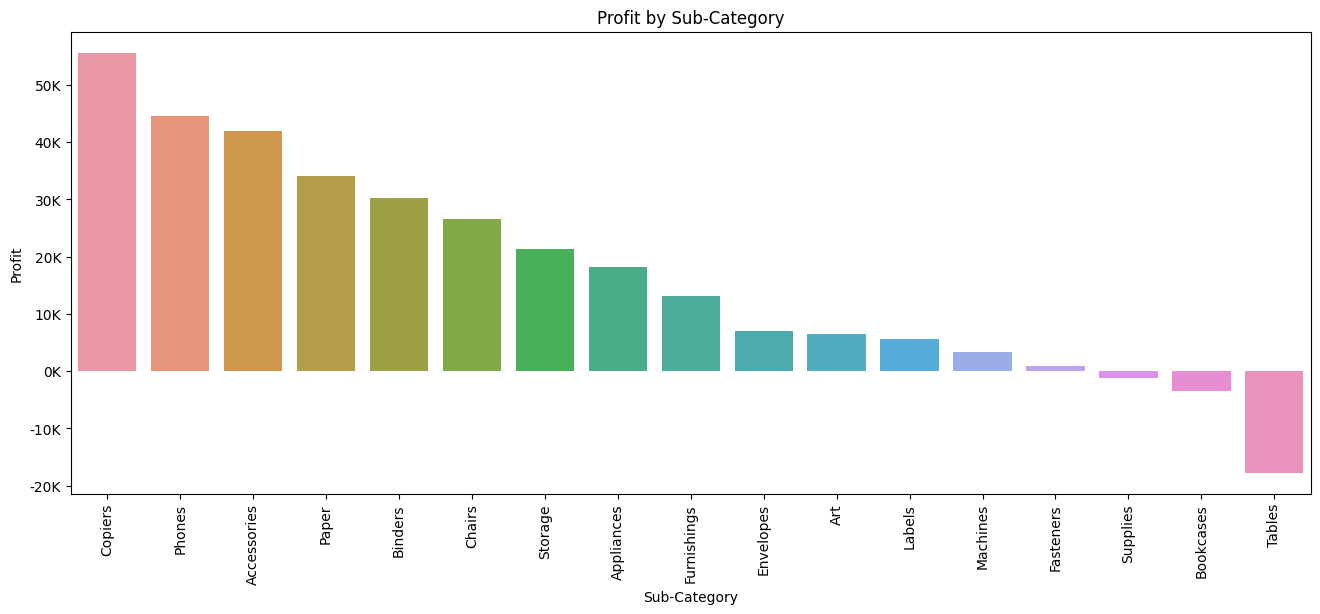

In [30]:
# bar chart of profit by sub-category
plt.figure(figsize=(16, 6))
sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=sum, ci=None,
            order=df.groupby('Sub-Category')['Profit'].sum()\
            .sort_values(ascending=False).index)\
            .yaxis.set_major_formatter(plt.FuncFormatter(
                lambda x, loc: "{:.0f}K".format(x * 1e-3)))\

plt.xticks(rotation='vertical')
plt.title('Profit by Sub-Category')
plt.show()

In [31]:
# change data type in column 'Order_Date'
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# create new columns from the order date , split the date into day , month ans year
df['day'] = df['Order_Date'].dt.day
df['month'] = df['Order_Date'].dt.month
df['year'] = df['Order_Date'].dt.year
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'day', 'month', 'year'],
      dtype='object')

Text(0.5, 1.0, '# Orders')

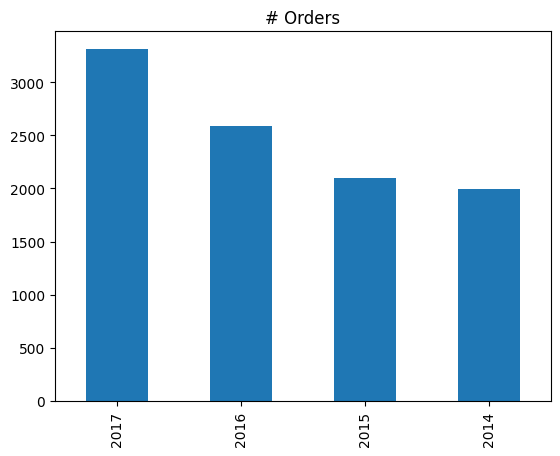

In [32]:
# show the orders over years
df['year'].value_counts().plot.bar().set_title('# Orders')

In [33]:
# show the sales in each year
year_sales = df.groupby(['year']).sum().sort_values('Sales',ascending=False)
year_sales.reset_index(inplace=True)
year_sales

<ipython-input-33-32f1023831f9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales = df.groupby(['year']).sum().sort_values('Sales',ascending=False)


,year,Sales,Quantity,Discount,Profit,day,month
0,2017,733215.2552,12476,518.22,93439.2696,50904,25605
1,2016,609205.5980,9837,400.32,81795.1743,39309,20079
2,2014,484247.4981,7581,315.46,49543.9741,31180,15663
3,2015,470532.5090,7979,327.09,61618.6037,33199,16703


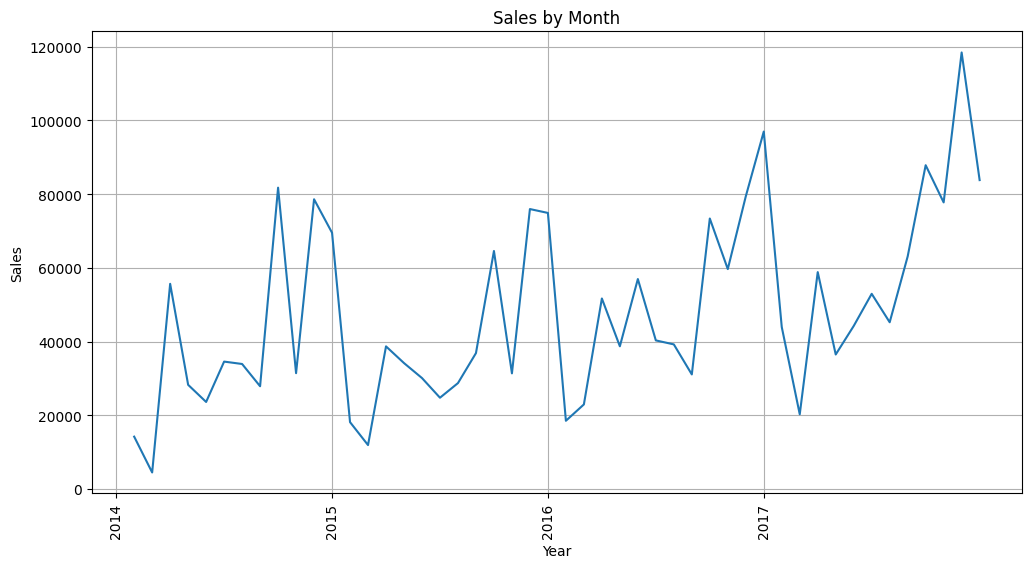

In [34]:
# Sales by month by year
sales_by_month = df.groupby(['year', 'month'])['Sales'].sum()

sales_df = sales_by_month.reset_index()

# Plot the sales by month
plt.figure(figsize=(12, 6))
plt.plot(sales_df['year'] + sales_df['month'] / 12, sales_df['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.xticks(sales_df['year'].unique(), rotation='vertical')
plt.grid(True)
plt.show()

In [35]:
# function to get sales for each month in the 4 years
all_sales = []

years = [2014, 2015, 2016, 2017]
for year in years :
    df_year = df[df['year'] == year]
    sales = df_year.groupby(['month'])['Sales'].sum()
    all_sales.append([year,sales])

all_sales

[[2014,
  month
  1     14236.8950
  2      4519.8920
  3     55691.0090
  4     28295.3450
  5     23648.2870
  6     34595.1276
  7     33946.3930
  8     27909.4685
  9     81777.3508
  10    31453.3930
  11    78628.7167
  12    69545.6205
  Name: Sales, dtype: float64],
 [2015,
  month
  1     18174.0756
  2     11951.4110
  3     38726.2520
  4     34195.2085
  5     30131.6865
  6     24797.2920
  7     28765.3250
  8     36898.3322
  9     64595.9180
  10    31404.9235
  11    75972.5635
  12    74919.5212
  Name: Sales, dtype: float64],
 [2016,
  month
  1     18542.4910
  2     22978.8150
  3     51715.8750
  4     38750.0390
  5     56987.7280
  6     40344.5340
  7     39261.9630
  8     31115.3743
  9     73410.0249
  10    59687.7450
  11    79411.9658
  12    96999.0430
  Name: Sales, dtype: float64],
 [2017,
  month
  1      43971.3740
  2      20301.1334
  3      58872.3528
  4      36521.5361
  5      44261.1102
  6      52981.7257
  7      45264.4160
  8      63120.8

In [36]:
all_sales[0]

[2014,
 month
 1     14236.8950
 2      4519.8920
 3     55691.0090
 4     28295.3450
 5     23648.2870
 6     34595.1276
 7     33946.3930
 8     27909.4685
 9     81777.3508
 10    31453.3930
 11    78628.7167
 12    69545.6205
 Name: Sales, dtype: float64]

In [37]:
# show sales in each year with months detail
sales_year_month = df.groupby(['year', 'month'])[['Sales', 'Quantity', 'Profit']].sum()
sales_year_month.reset_index(inplace=True)
sales_year_month

,year,month,Sales,Quantity,Profit
0,2014,1,14236.8950,284,2450.1907
1,2014,2,4519.8920,159,862.3084
2,2014,3,55691.0090,585,498.7299
3,2014,4,28295.3450,536,3488.8352
4,2014,5,23648.2870,466,2738.7096
5,2014,6,34595.1276,521,4976.5244
6,2014,7,33946.3930,550,-841.4826
7,2014,8,27909.4685,609,5318.1050
8,2014,9,81777.3508,1000,8328.0994
9,2014,10,31453.3930,573,3448.2573


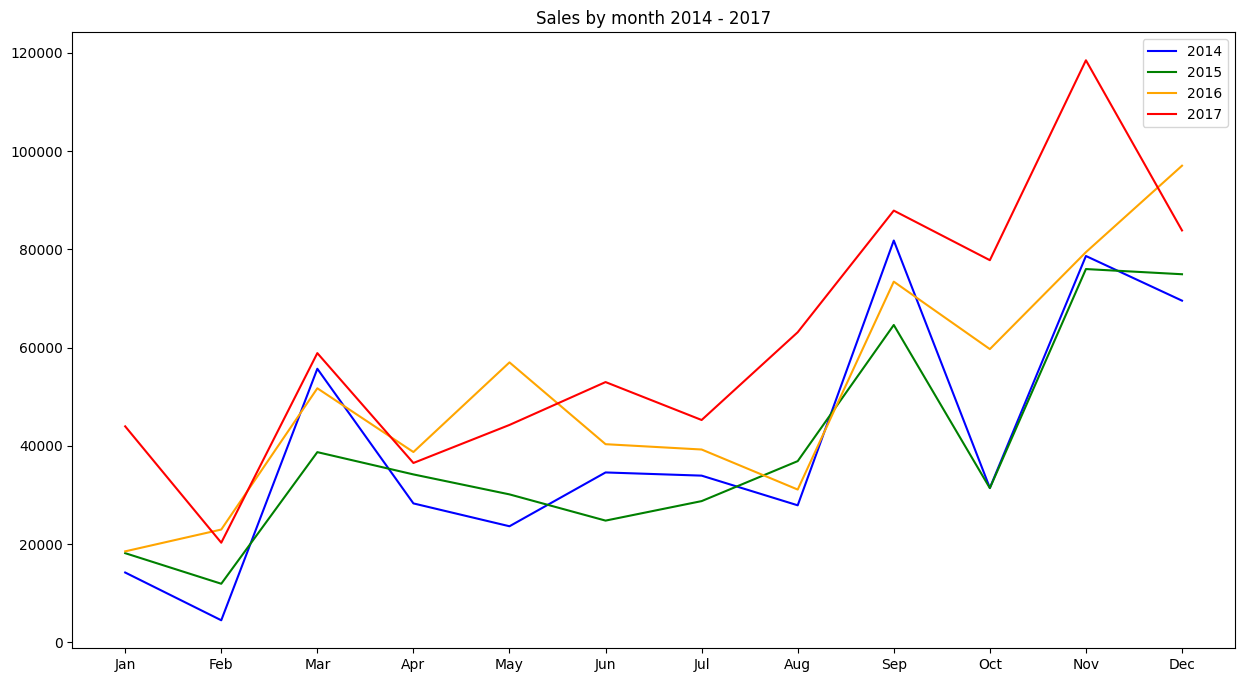

In [38]:
# plot sales by month for each year in df
plt.figure(figsize=(15, 8))

# sum sales for every month for single year and make it into new df
sales_2014 = df[df['year'] == 2014][['month', 'Sales']].groupby(['month']).sum()
# reset index because now month column is index
sales_2014.reset_index(inplace=True)
plt.plot(sales_2014['month'], sales_2014['Sales'], color='blue', label='2014')

sales_2015 = df[df['year'] == 2015][['month', 'Sales']].groupby(['month']).sum()
sales_2015.reset_index(inplace=True)
plt.plot(sales_2015['month'], sales_2015['Sales'], color='green', label='2015')

sales_2016 = df[df['year'] == 2016][['month', 'Sales']].groupby(['month']).sum()
sales_2016.reset_index(inplace=True)
plt.plot(sales_2015['month'], sales_2016['Sales'], color='orange', label='2016')

sales_2017 = df[df['year'] == 2017][['month', 'Sales']].groupby(['month']).sum()
sales_2017.reset_index(inplace=True)
plt.plot(sales_2015['month'], sales_2017['Sales'], color='red', label='2017')

plt.title('Sales by month 2014 - 2017')
plt.legend()

# Get month abbreviations
month_abbr = [calendar.month_abbr[i] for i in range(1, 13)]
# Set x-ticks to month abbreviations
plt.xticks(range(1, 13), month_abbr)

plt.show()


In [39]:
# as the data looks clean, export file to use for making vizualisation using
# tools for better looks like Tableau
df_tableau = df.copy()
# change '_' to ' ' for presentation reasons
df_tableau.columns = df_tableau.columns.str.replace('_', ' ')
# export file to use for making vizualisation in Tableau
df_tableau.to_csv('/content/drive/MyDrive/Colab Notebooks/superstore_sales/'
        'superstore_sales_tableau.csv', encoding='utf-8', index=False)